# Regression Analysis

In this notebook, we'll explore how regression models work in a practical way. 

But we will not use pre-defined functions here. Instead, let's dive into the calculational steps of the process!! 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [61]:
df = pd.read_csv("abalone.data.csv")

In [62]:
df

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [63]:
df.shape

(4177, 9)

In [64]:
df.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weightShucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [65]:
df.isna().sum()

Sex                           0
Length                        0
Diameter                      0
Height                        0
Whole weightShucked weight    0
Viscera weight                0
Shell weight                  0
Rings                         0
Age                           0
dtype: int64

In [66]:
df = df.drop("Sex", axis=1)
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weightShucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

# Visualization

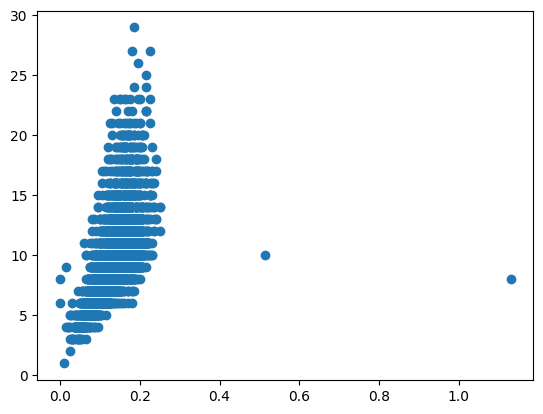

In [95]:
plt.scatter(df['Height'], df['Age'])

#  Linear Regression

In [83]:
def predict(X, w, b):
    y_pred = np.dot(X, w) + b
    return y_pred

def cost_function(X, y, w, b):
    y_pred = predict(X, w, b)
    cost = (y - y_pred)**2
    return np.mean(cost)

def diff_w(X, y, w, b):
    y_pred = predict(X, w, b)
    m = X.shape[0]
    f = -1 * sum((y - y_pred).reshape(-1, 1) * X)
    # f = np.dot(X.T, (y_pred - y))
    diff = f / m
    return diff

def diff_b(X, y, w, b):
    y_pred = predict(X, w, b)
    m = X.shape[0]
    f = -1 * sum(y - y_pred)
    # f = np.sum(y_pred - y)
    diff =  f / m
    return diff

def gradient_descent_traditional(X, y, w, b, iterations):
    learning_rate = 0.01
    
    for i in range(iterations):
        dx = diff_w(X, y, w, b)
        db = diff_b(X, y, w, b)
        
        w = w - (learning_rate * dx)
        b = b - (learning_rate * db)
        # print(f"weight: {w}")
        # print(f"bias: {b}")
        if i % 100 == 0:
            print(f"epoch {i}: {cost_function(X, y, w, b)}")
    return w, b

In [84]:
# # X = np.expand_dims(train[:, 0], -1)
# # X = np.hstack((np.ones_like(X), X))
# # y = train[:, 1]

# data_x = np.linspace(1.0, 10.0, 100)
# data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100)
# data_x = data_x[:, np.newaxis]
# data_x /= np.max(data_x)

# # data_x = np.hstack((np.ones_like(data_x), data_x))

# n = int(data_x.shape[0] * 0.8)

# train_x = data_x[:n, :]
# train_y = data_y[:n]
# test_x = data_x[n:, :]
# test_y = data_y[n:]

# print(train_x.shape)
# print(train_y.shape)

n = int(len(df) * 0.8)

train_X = df.iloc[:n,:-1].to_numpy()
train_Y = df.iloc[:n,-1].to_numpy()
test_X = df.iloc[n:,:-1].to_numpy()
test_Y = df.iloc[n:,-1].to_numpy()

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

w = np.random.rand(train_X.shape[1])
b = np.zeros(1)

# print(X.shape)
# print(y.shape)
print(w.shape)
print(b.shape)

(3341, 7)
(3341,)
(836, 7)
(836,)
(7,)
(1,)


In [85]:
start = time.time()
w, b = gradient_descent_traditional(train_X, train_Y, w, b, 500)
print(time.time() - start)

epoch 0: 95.00979552610818
epoch 100: 9.12637727030622
epoch 200: 8.336838993333044
epoch 300: 8.11942055842839
epoch 400: 7.95781617249611
1.5209441184997559


# Predict

In [89]:
def predict(x, w, b):
    pred = np.dot(x, w) + b
    return pred

def mean_sq_error(y, y_pred):
    cost = (y - y_pred)**2
    return np.mean(cost)

In [90]:
pred = predict(test_X, w, b)

print(f"cost: {mean_sq_error(test_Y, pred)}")

cost: 5.898853301236924


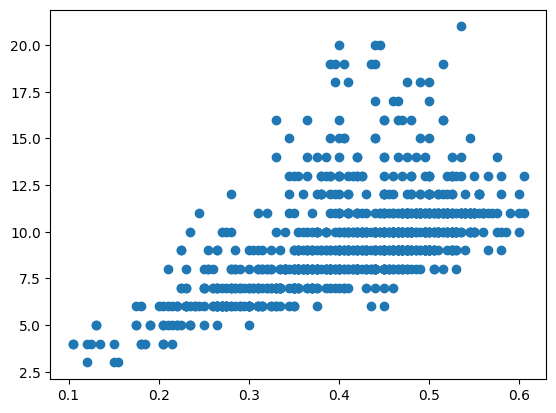

In [93]:
plt.scatter(test_X[:, 1], test_Y)

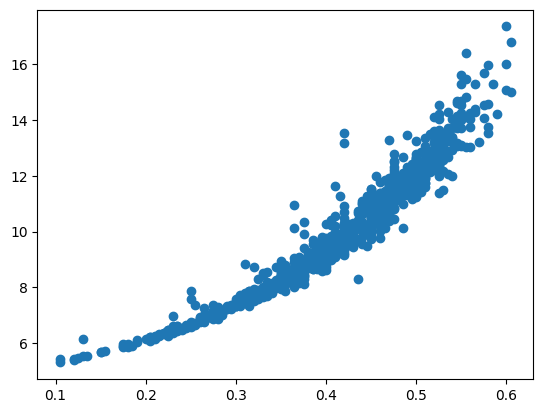

In [94]:
plt.scatter(test_X[:, 1], pred)

In [ ]:
X -> y
X -> y


X -> balls with different colors

model -> cluster balls with same color

In [ ]:
x, x^2, x^3

In [ ]:
more layer -> more complex
more neurons -> more complex